# Problem set for Swipe Right to Spike: Part 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# feel free to use this functions to make your plots look nicer :)
def set_font_size(ax, font_size, legend_font_size=None):
    """Set fontsize of all axis text objects to specified value."""

    texts = ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels())

    for text in texts:
        text.set_fontsize(font_size)

    if legend_font_size is None:
        legend_font_size = font_size

    legend = ax.get_legend()

    if legend:
        for text in legend.get_texts():
            text.set_fontsize(legend_font_size)

# 3. White noise

Gaussian white noise is a common stimulus in neuroscience because it is one of the simplest random processes that still samples diverse patterns.

A. Generate 5 seconds of a Gaussian white noise stimulus at 1000 Hz with zero mean and a standard deviation of 3 nA (in any given $\Delta t$). How big should each timestep be? Plot the resulting trace over time. Plot a histogram of the stimulus values aggregated over time using 30 bins. What are the mean and standard deviation of your sample? How do you expect their accuracy to the true mean and standard deviation to change as the number of samples increase?

B. A key specifier of a temporal random process $X(t)$ is its autocovariance function $C(\tau)$, which gives the covariance between two samples of the process at a time lag $\tau$. That is, $C(\tau) = E[(X(t) - E[X(t)])(X(t - \tau) - E[X(t - \tau)])]$. The variance of $X$ at a single timestep is then just $C(0) = E[(X(t) - E[X(t)])^2]$.

White noise is a useful process because $X$ at all timepoints are independent, so that $C(\tau \neq 0) = 0$, i.e. there is zero covariance between time points separated by a nonzero time lag. Mathematically, $C(\tau) = \sigma^2 \delta(\tau)$, where $\delta(\tau)$ is the $\delta$ function, which is infinite at $\tau = 0$ and 0 otherwise, and satsifies $\int_{-\infty}^{\infty} \delta(\tau) d\tau = 1$. This means that in continuous time, the variance of a white noise process $C(0)$ is infinite. This is weird, but it turns out the integration property of the $\delta$ function means things are actually well behaved.

Given the above information, what units is $\delta(\tau)$ in? If X is in units of nA, what units is $C(\tau)$ in? What units is $\sigma$ in?

C. To generate a discretized approximation to white noise using timestep $\Delta t$ we need to specify the standard deviation to use in any given individual time bin. Of course, we can't actually use $\sigma^2 \times \infty$ as a variance since then everything will be infinite and there will be no dependence on $\sigma$. What is the natural way to discretize the $\delta$ function given $\Delta t$? (Hint: it is not simply the Kronecker delta function.)

D. Given the discretized $\delta$ function from C, what standard deviation must we use at each timestep to generate an accurate discrete approximation of a white noise process that has with autocovariance $C(\tau) = \sigma^2 \delta(\tau)$ in continuous time?

E. First, generate a 1-second long sample of a Gaussian white noise process discretized at $\Delta t = 1$ ms, whose standard deviation per timestep is 1 nA. What is $\sigma$? Using the above results, generate a sample of an equivalent white noise process discretized at $\Delta t = 0.5$ ms. Repeat for $\Delta t = 5$ ms. Plot all three samples.

## A

For a 1000 Hz sampling freq, the timestep or time bin should be $\Delta t = 1$ ms.

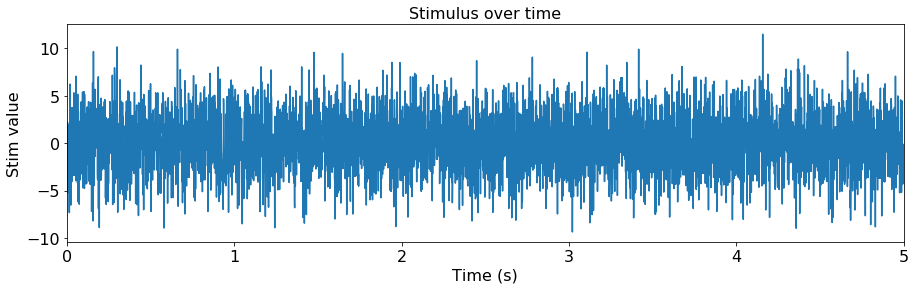

In [2]:
dt = 1/1000  # sampling interval = 1/sampling freq
t = np.arange(0, 5, dt)  # make time array
s = np.random.normal(0, 3, t.shape)  # generate white noise stim

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(t, s)

ax.set_xlim(0, 5)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Stim value')
ax.set_title('Stimulus over time')

set_font_size(ax, 16)

Mean =  0.0748808721528
Std =  3.01919734112


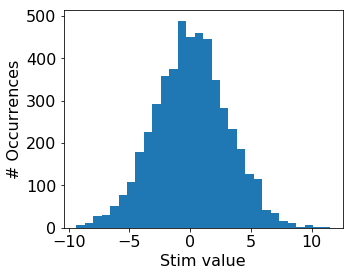

In [3]:
# histogram
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.hist(s, bins=30)
ax.set_xlabel('Stim value')
ax.set_ylabel('# Occurrences')

set_font_size(ax, 16)

print('Mean = ', np.mean(s))
print('Std = ', np.std(s))

The mean and std of your white noise sample should get closer to the truth as the number of samples increases.

## B

$\delta(\tau)$ is in units of 1/time since its integral with respect to time is unitless. $C(\tau)$ is in nA$^2$, since it is the expectation over the product of two currents. $\sigma$ is the weird one, which is in units of nA$\sqrt{\textrm{time}}$. This is required for $C(\tau) = \sigma^2\delta(\tau)$ to be in units of nA$^2$.

## C

To discretize the delta function we must discretize the property $\int_{-\epsilon}^\epsilon \delta(\tau) d\tau = 1$. We do this by changing the integral to a sum $\sum\limits_{\tau=-1}^1 \delta^d_\tau \Delta \tau = 1$, where $\delta^d_\tau$ is our the discrete delta function.

Since $\delta^d_\tau$ should be zero everywhere but at $\tau = 0$. Thus, we have $\delta^d_0 \Delta \tau = 1$. Therefore, $\delta^d_0 = 1/\Delta \tau$, so $\delta^d_\tau$ is $0$ for $\tau \neq 0$ and $1/\Delta \tau$ for $\tau = 0$.

## D
The discrete variance is thus $C^d(0) = \sigma^2 \delta^d_0 = \cfrac{\sigma^2}{\Delta t}$ so the standard deviation is $\cfrac{\sigma}{\sqrt{\Delta t}}$. This has the units of the stimulus.

## E

If the standard deviation is $1$ nA, then 1 nA = $\cfrac{\sigma}{\sqrt{\Delta t}} = \cfrac{\sigma}{\sqrt{1\textrm{ ms}}}$ so $\sigma = (1\textrm{ nA}) \sqrt{1\textrm{ ms}}$.

For $\Delta t = 0.5 \textrm{ ms}$ the standard deviation is $\cfrac{\sigma}{\sqrt{.5\textrm{ ms}}} = \sqrt{2}$ nA.

For $\Delta t = 5 \textrm{ ms}$ the standard deviation is $\cfrac{\sigma}{\sqrt{5\textrm{ ms}}} = \cfrac{1}{\sqrt{5}}$ nA.

dt = 0.0005 s:
std = 1.41421356237 nA
dt = 0.001 s:
std = 1.0 nA
dt = 0.005 s:
std = 0.4472135955 nA


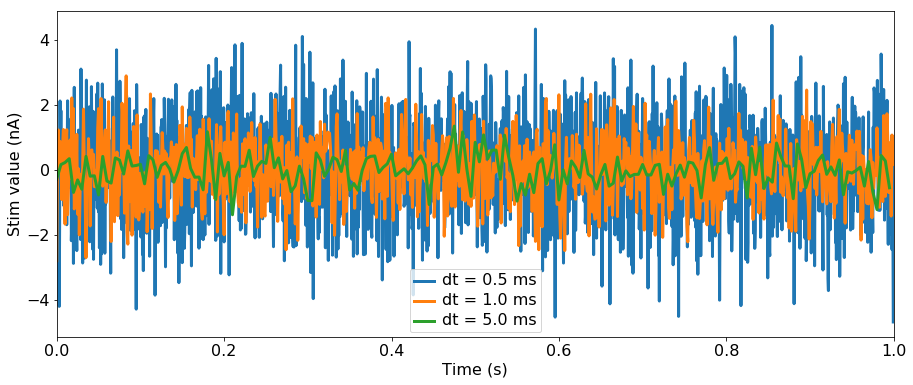

In [4]:
sgm = 1e-9 * np.sqrt(.001)  # nA*sqrt(s)
dts = [.0005, .001, .005]

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

for dt in dts:
    # set std for this dt
    std = sgm/np.sqrt(dt)
    print('dt =', dt, 's:')
    print('std =', 1e9*std, 'nA')
    t = np.arange(0, 1, dt)
    s = np.random.normal(0, sgm/np.sqrt(dt), t.shape)
    
    ax.plot(t, 1e9*s, lw=3)
    
ax.set_xlim(0, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Stim value (nA)')
ax.legend(['dt = ' + str(1000 * dt) + ' ms' for dt in dts])

set_font_size(ax, 16)

# 4. LIF model

A. Make a leaky integrate-and-fire model with $\tau = 50$ ms, $v_{leak}$ = -70 mV, $v_{th}$ = -40 mV, and $R = 20$ M$\Omega$. Specifically, write a function that takes an external current sequence `i_ext` and outputs (a) a sequence of membrane voltages, (b) a binary spike sequence, (c) an array of spike times, (d) a time vector. Assume $\Delta t = 1$ ms.

B. Using your function, drive the LIF neuron with a 3-second step input of current starting at 100 ms. Vary the current amplitude over 0 nA, 0.25 nA, 0.5 nA, ..., 5 nA. Plot example voltage responses and spikes for a small, medium, and large current input.

C. Use the results of B to make an "f-i" curve, which shows the firing rate $f$ (estimated over the 3 seconds) as a function of the current input $i$.

D. Now drive the neuron for 1000 s with a white noise stimulus whose standard deviation in one time bin is 8 nA. Plot the inter-spike interval distribution of the resulting spike sequence. What can you say about the distribution of spikes?

## A

We'll use the equation

$\tau\cfrac{dv}{dt} = -(v - v_{leak}) + RI(t)$.

We can discretize this via:

$\tau\cfrac{\Delta v}{\Delta t} =  -(v_t - v_{leak}) + RI_t$

so that

$\Delta v = \cfrac{\Delta t}{\tau}\left[-(v_t - v_{leak}) + RI_t\right]$.

We implement this below.

In [5]:
# make model neuron
## set our neuron params
DT = 0.001  # s
TAU = 0.05  # s
V_LEAK = -0.07  # V
V_TH = -0.04  # V
R = 20e6  # Ohms

# define our LIF simulation function
def run_lif(i_ext):
    """Run LIF neuron simulation given external current."""
    # make time vector based on length of current sequence
    t = np.arange(len(i_ext)) * DT
    
    # make array to store voltages
    v = np.nan * np.zeros(len(t))
    v[0] = V_LEAK  # set initial voltage
    
    # make binary array for storing spikes
    spks = np.zeros(len(v), dtype=bool)  
    ts_spk = []  # list to store spk times
    
    # loop over timesteps
    for t_ctr in range(1, len(t)):
        
        # get RI
        ri = R * i_ext[t_ctr]
        
        # update voltage
        ## get voltage increment from LIF equation
        dv = (DT/TAU)*(-(v[t_ctr-1] - V_LEAK) + ri)
        
        # add voltage increment
        v[t_ctr] = v[t_ctr-1] + dv
        
        # check if voltage over spk threshold
        if v[t_ctr] > V_TH:
            # store spike
            spks[t_ctr] = True
            ts_spk.append(t[t_ctr])
            # reset v
            v[t_ctr] = V_LEAK
            
    # return stuff
    return v, spks, np.array(ts_spk), t

## B

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


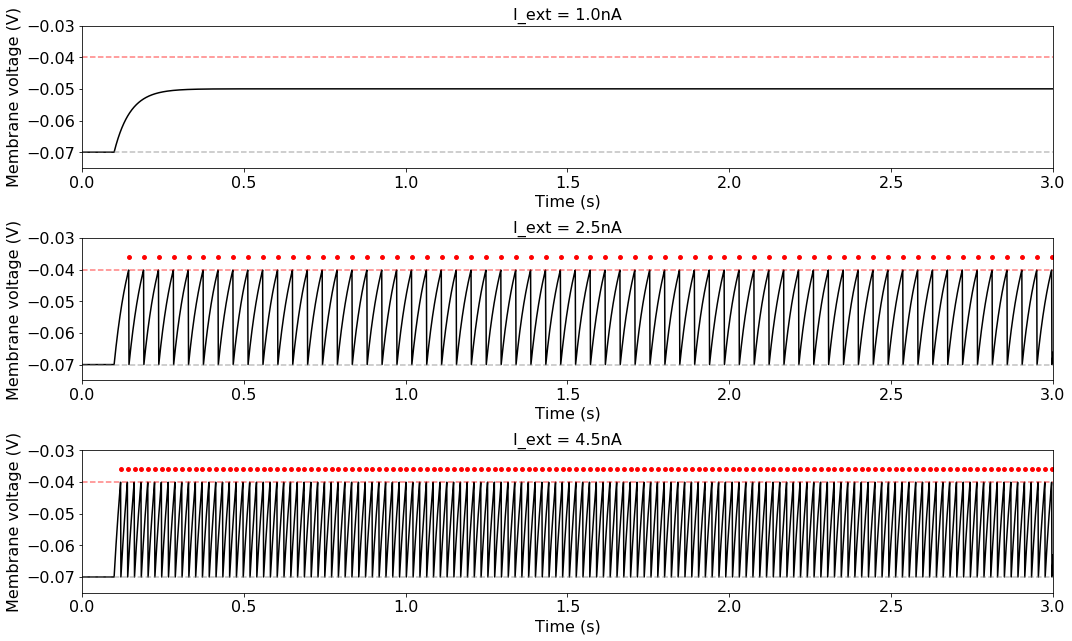

In [6]:
# drive LIF neuron w/ diff currents
i_ext_amps = np.linspace(0, 5e-9, 21)

# for storing stuff
vs_all = []
ts_spk_all = []
frs_all = []

# loop over current amplitudes
for i_ext_amp in i_ext_amps:
    
    # make array for current stim
    i_ext = np.zeros(3100)
    i_ext[100:] = i_ext_amp  # set currents beyond 100 ms to i_ext_amp
    
    # drive neuron using our LIF function
    v, spks, ts_spk, t = run_lif(i_ext)
    
    # save results
    vs_all.append(v)
    ts_spk_all.append(ts_spk)
    
    # save firing rate for F-I curve
    fr = len(ts_spk[ts_spk > .1]) / 3
    frs_all.append(fr)
    
# plot examples
fig, axs = plt.subplots(3, 1, figsize=(15, 9), tight_layout=True)

xmpl_ctrs = [4, 10, 18]  # idxs of current amplitudes to plot

# time vector
t = np.arange(3100) * DT

# loop over examples to plot
for xmpl_ctr, ax in zip(xmpl_ctrs, axs):
    
    v = vs_all[xmpl_ctr]
    ts_spk = ts_spk_all[xmpl_ctr]
    
    ax.plot(t, v, color='k')
    ax.scatter(ts_spk, -0.036*np.ones(len(ts_spk)), c='r', s=15)
    
    ax.set_title('I_ext = ' + str(1e9 * i_ext_amps[xmpl_ctr]) + 'nA')
    
    ax.axhline(V_LEAK, ls='--', c='gray', alpha=0.5)
    ax.axhline(V_TH, ls='--', c='r', alpha=0.5)
    
for ax in axs:
    ax.set_xlim(0, 3)
    ax.set_ylim(-0.075, -0.03)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Membrane voltage (V)')
    
    set_font_size(ax, 16)

## C

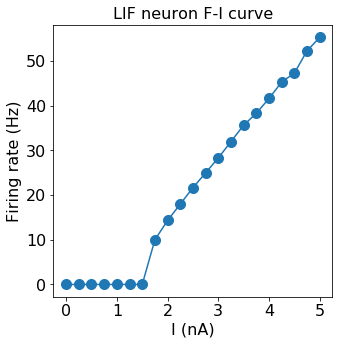

In [7]:
# F-I curve
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# plot current input (in nA) on x-axis and firing rate on y-axis
ax.plot(1e9 * i_ext_amps, frs_all, marker='.', markersize=20)
ax.set_xlabel('I (nA)')
ax.set_ylabel('Firing rate (Hz)')

ax.set_title('LIF neuron F-I curve')
set_font_size(ax, 16)

## D

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


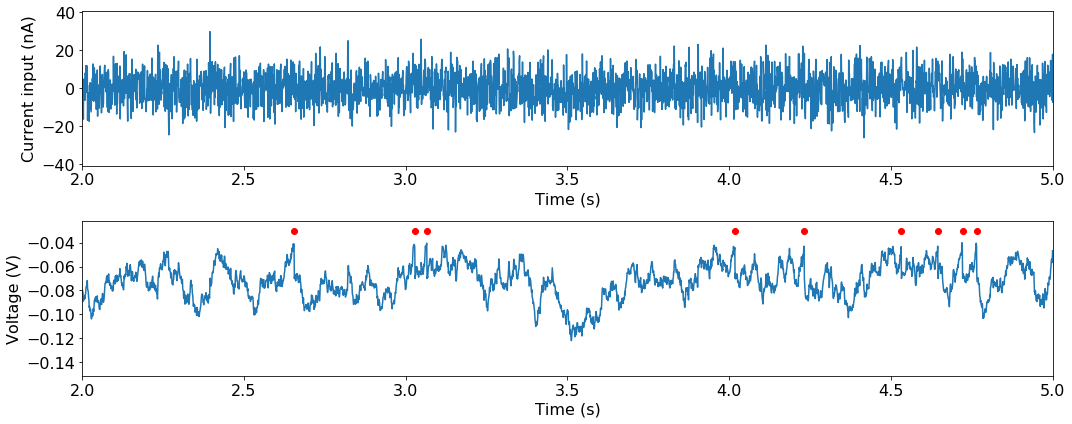

In [8]:
# white noise
np.random.seed(1)  # seed RNG
# make white noise
i_ext = np.random.normal(0, 8e-9, 1000 * 1000)

# drive nrn
v, spks, ts_spk, t = run_lif(i_ext)

fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)
axs[0].plot(t, 1e9 * i_ext)
axs[0].set_ylabel('Current input (nA)')

axs[1].plot(t, v)
axs[1].scatter(ts_spk, -0.03 * np.ones(len(ts_spk)), c='r')
axs[1].set_ylabel('Voltage (V)')

for ax in axs:
    ax.set_xlim(2, 5)
    ax.set_xlabel('Time (s)')
    set_font_size(ax, 16)

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


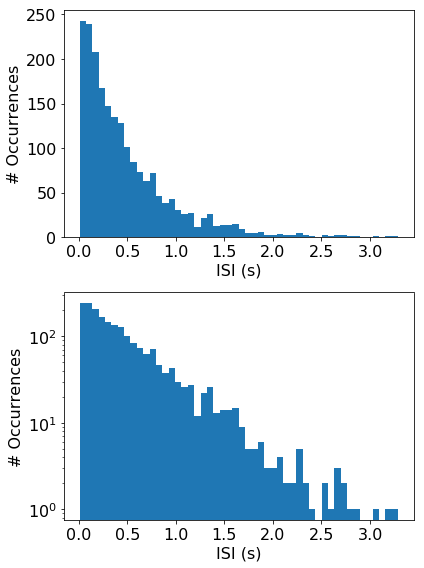

In [9]:
# ISI
isis = ts_spk[1:] - ts_spk[:-1]
fig, axs = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True)

axs[0].hist(isis, bins=50)
axs[1].hist(isis, bins=50)
axs[1].set_yscale('log', nonposy='clip')

for ax in axs:
    ax.set_xlabel('ISI (s)')
    ax.set_ylabel('# Occurrences')
    set_font_size(ax, 16)

The log histogram follows almost a straight line, suggesting that the ISI is exponentially distributed. Thus, spikes in an LIF neuron driven by white noise the spikes are approximately Poisson (at least for this noise level).

# 5. LNP model

A. Using the linear-nonlinear-Poisson modeling framework, construct a model neuron that preferentially spikes when the (leaky) moving average over the last ~30 ms of the stimulus is large. Use the sinusoidal stimulus given in `lnp_stim.npy` as a guide (for example, this might be the time-varying luminance of an image on a monitor). This is a 10 s stimulus sampled at 1000 Hz. Plot your filter, the distribution of the sinusoidal stimulus projected onto the filter, and your chosen nonlinearity.

B. Drive the neuron with the stimulus given in `lnp_stim.npy` and plot the resulting firing rate and a few example spike trains over 2 seconds, with the stimulus shown in a plot below. Does the neuron appear to be doing what it's supposed to?

C. Repeat A and B for a neuron that spikes in response to a large-magnitude (sign-independent) time-derivative, also computed over 30 ms or so.

D. Plot several example spike trains for each of your two neurons overlaid with the stimulus shown below.

## A

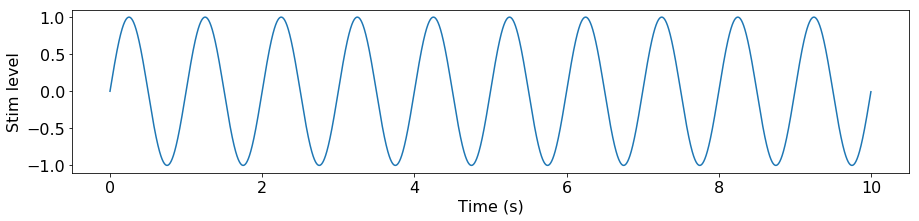

In [10]:
DT = 0.001

# load data and plot stim
data = np.load('lnp_stim.npy')[0]

t = data['t']
s = data['s']

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.plot(t, s)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Stim level')

set_font_size(ax, 16)

To calculate a leaky average we'll use an exponential filter with a time constant ~ 30 ms. We'll use a monotonic increasing filter so that only large positive averages increase spike probability.

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


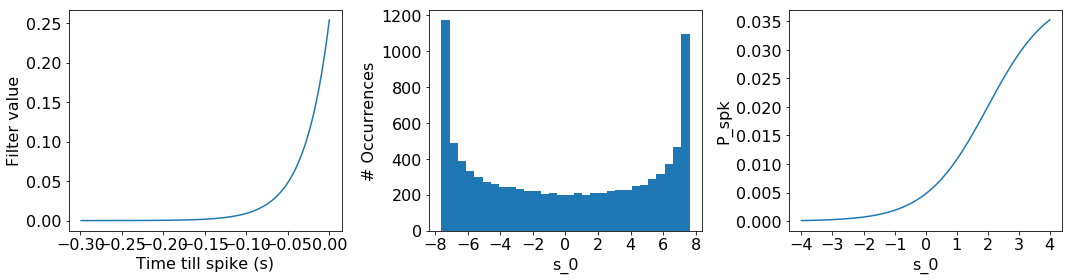

In [11]:
# use exponential filter to compute leaky moving average
t_h = np.arange(0, .3, DT)
h_0 = np.exp(-t_h/.03)
h_0 /= np.sqrt(np.sum(h_0**2))  # rescale so h_0 has norm 1

# array for storing s_0
s_0 = np.nan * np.zeros(s.shape)

# loop over timesteps
for t_ctr in range(len(t_h), len(t)):
    s_ = s[t_ctr-len(t_h):t_ctr]  # get last stim chunk
    
    s_0_ = np.dot(s_, h_0[::-1])  # get filtered stim
    s_0[t_ctr] = s_0_  # store s_0

# define nonlin
def calc_g_0(s_0):
    
    return 40 * DT / (1 + np.exp(-(s_0-2)/1))

s_0_g_0_plot = np.linspace(-4, 4, 100)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)

axs[0].plot(-t_h, h_0)
axs[0].set_xlabel('Time till spike (s)')
axs[0].set_ylabel('Filter value')

axs[1].hist(s_0[~np.isnan(s_0)], bins=30)
axs[1].set_xlabel('s_0')
axs[1].set_ylabel('# Occurrences')

axs[2].plot(s_0_g_0_plot, calc_g_0(s_0_g_0_plot))
axs[2].set_xlabel('s_0')
axs[2].set_ylabel('P_spk')

for ax in axs:
    set_font_size(ax, 16)

## B

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


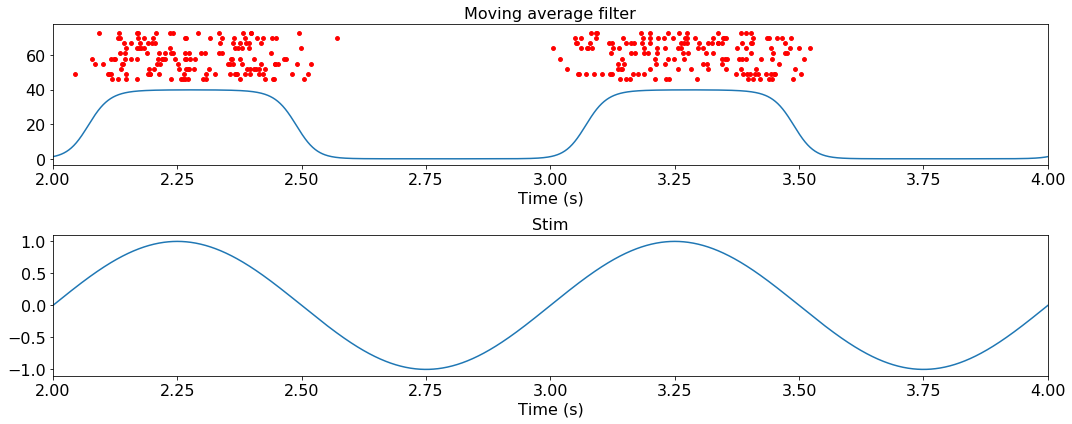

In [12]:
# compute spiking probability
p_spk_0 = calc_g_0(s_0)

spks_0 = []

# loop over trials
for ctr in range(10):
    
    # get spike train
    spks_0_ = np.random.rand(len(t)) < p_spk_0
    
    # store
    spks_0.append(spks_0_)
    
# plot firing rates and spike trains for each neuron
fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)

axs[0].plot(t, p_spk_0/DT)

for ctr, spks_0_ in enumerate(spks_0):
    y = 46 + 3*ctr  # to set y-position of raster row
    ts_spk = np.nonzero(spks_0_)[0] * DT
    
    axs[0].scatter(ts_spk, y*np.ones(len(ts_spk)), c='r', s=15)
    
axs[0].set_title('Moving average filter')

axs[1].plot(t, s)
axs[1].set_title('Stim')

for ax in axs:
    ax.set_xlim(2, 4)
    ax.set_xlabel('Time (s)')
    set_font_size(ax, 16)

## C

For a differentiating filter we'll choose a biphasic filter shape, so that the filter ends up subtracting one portion of the stimulus from the stimulus a short time after. We'll use an exponentially modulated sine wave for this:

$h(t) = e^{-(t_h-0.08)/0.02}\sin(2\pi t/0.1)$ where the time units are seconds.

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


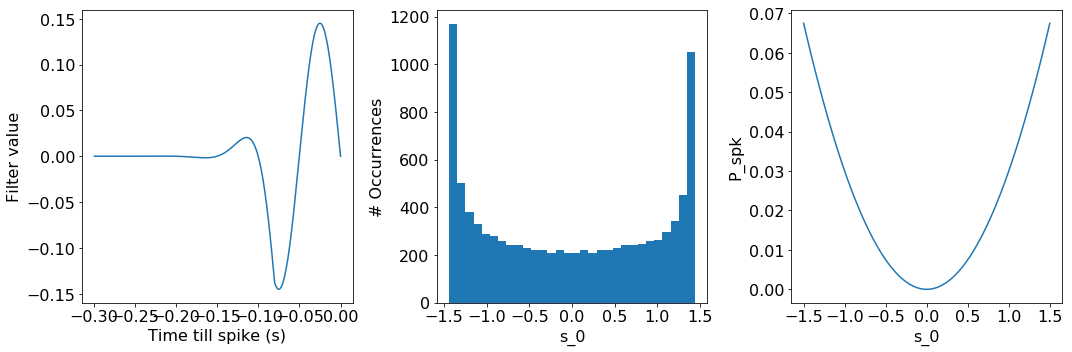

In [13]:
# make differentiating filter
t_h = np.arange(0, .3, DT)
# sin part
h_1 = np.sin(2*np.pi*t_h/.1)
# exponential part
m = np.exp(-(t_h-.08)/.02)
# set portions of exponential greater than 1 to 1 (so sine wave isn't increased anywhere)
m[m > 1] = 1
# multiply sin part by exponential part
h_1 *= m
h_1 /= np.sqrt(np.sum(h_1**2))  # rescale to have norm 1

# to store stimulus projected onto filter
s_1 = np.nan * np.zeros(s.shape)

# loop
for t_ctr in range(len(t_h), len(t)):
    s_ = s[t_ctr-len(t_h):t_ctr]  # get last stim chunk
    
    s_1_ = np.dot(s_, h_1[::-1])  # filter stim
    s_1[t_ctr] = s_1_  # store

def calc_g_1(s_1):
    return 30 * DT * (s_1**2)

s_1_g_1_plot = np.linspace(-1.5, 1.5, 100)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

axs[0].plot(-t_h, h_1)
axs[0].set_xlabel('Time till spike (s)')
axs[0].set_ylabel('Filter value')

axs[1].hist(s_1[~np.isnan(s_1)], bins=30)
axs[1].set_xlabel('s_0')
axs[1].set_ylabel('# Occurrences')

axs[2].plot(s_1_g_1_plot, calc_g_1(s_1_g_1_plot))
axs[2].set_xlabel('s_0')
axs[2].set_ylabel('P_spk')

for ax in axs:
    set_font_size(ax, 16)

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


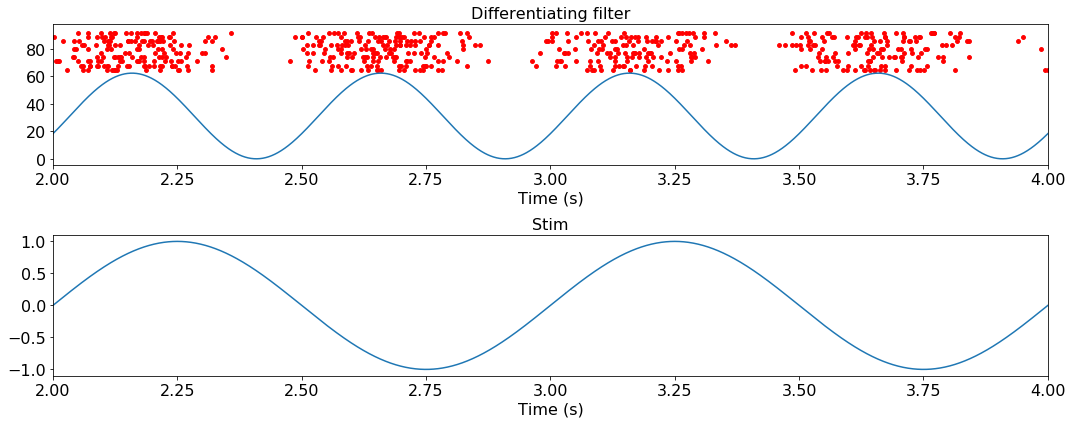

In [14]:
# compute spike prob
p_spk_1 = calc_g_1(s_1)

spks_1 = []

# loop over trials
for ctr in range(10):
    # generate spike train
    spks_1_ = np.random.rand(len(t)) < p_spk_1
    
    spks_1.append(spks_1_)
    
# plot firing rates and spike trains for each neuron
fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)

axs[0].plot(t, p_spk_1/DT)

for ctr, spks_1_ in enumerate(spks_1):
    y = 65 + 3*ctr  # y-position of raster row
    ts_spk = np.nonzero(spks_1_)[0] * DT
    
    axs[0].scatter(ts_spk, y*np.ones(len(ts_spk)), c='r', s=15)
    
axs[0].set_title('Differentiating filter')

axs[1].plot(t, s)
axs[1].set_title('Stim')

for ax in axs:
    ax.set_xlim(2, 4)
    ax.set_xlabel('Time (s)')
    set_font_size(ax, 16)

## D

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


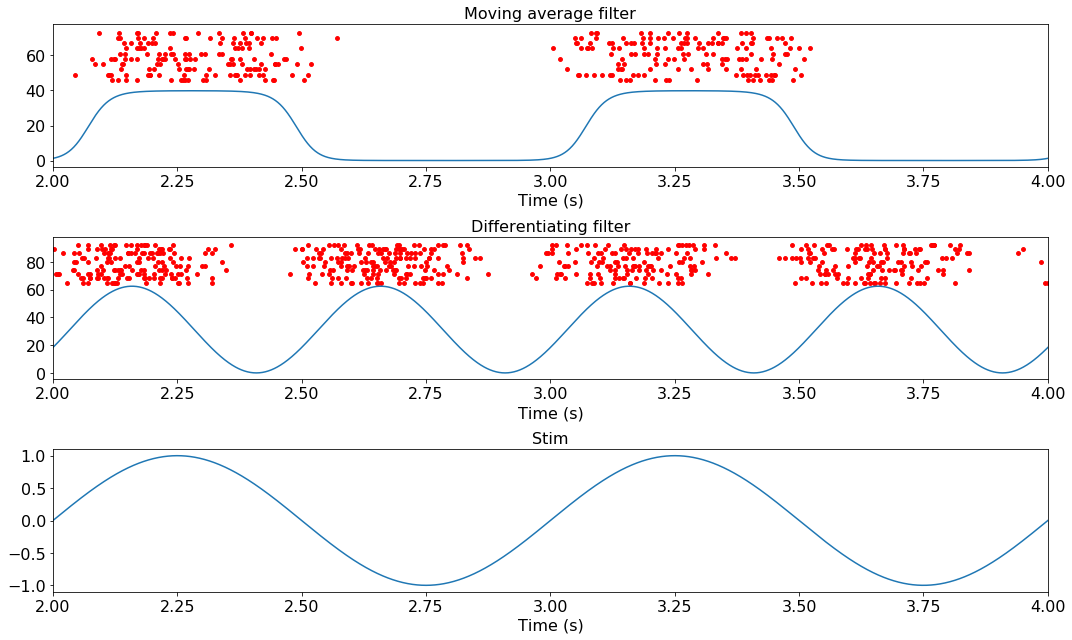

In [15]:
# plot firing rates and spike trains for each neuron
fig, axs = plt.subplots(3, 1, figsize=(15, 9), tight_layout=True)

axs[0].plot(t, p_spk_0/DT)

for ctr, spks_0_ in enumerate(spks_0):
    y = 46 + 3*ctr
    ts_spk = np.nonzero(spks_0_)[0] * DT
    
    axs[0].scatter(ts_spk, y*np.ones(len(ts_spk)), c='r', s=15)
    
axs[0].set_title('Moving average filter')

axs[1].plot(t, p_spk_1/DT)

for ctr, spks_1_ in enumerate(spks_1):
    y = 65 + 3*ctr
    ts_spk = np.nonzero(spks_1_)[0] * DT
    
    axs[1].scatter(ts_spk, y*np.ones(len(ts_spk)), c='r', s=15)
    
axs[1].set_title('Differentiating filter')

axs[2].plot(t, s)
axs[2].set_title('Stim')

for ax in axs:
    ax.set_xlim(2, 4)
    ax.set_xlabel('Time (s)')
    set_font_size(ax, 16)

# 6. Synaptic connectivity

Consider the conductance-based synapse equation for a single presynaptic input shown in the slides:

$\tau \cfrac{dV}{dt} = -(V(t) - V_{leak}) + RI(t) + RI_{syn}(t)$

$I_{syn}(t) = g_{syn}(t)(E_{syn} - V(t))$

$g_{syn}(t) = w \sum\limits_{t^k_{spk}} \alpha(t - t^k_{spk})$

A. How would you generalize the conductance-based synapse equations to account for multiple presynaptic inputs with different excitatory synaptic weights?

B. How would you generalize this to multiple synapse types (e.g. excitatory and inhibitory)?

## A
The key change here is to sum over all presynaptic (upstream) cells $j$ in the conductance term $g^i_{syn}(t)$. (Note we add the subscript $i$ in case we want to use multiple downstream cells as well, as in a network.)

$\tau \cfrac{dV_i}{dt} = -(V_i(t) - V_{leak}) + RI_i(t) + RI^i_{syn}(t)$

$I^i_{syn}(t) = g^i_{syn}(t)(E_{syn} - V_i(t))$

$g^i_{syn}(t) = \sum\limits_j w_{ij} \sum\limits_{t^{j,k}_{spk}} \alpha(t-t^{j,k}_{spk})$

## B

Here the key change is to sum over different synapse types $s$ as well, when computing the total synaptic current. We also require a different reversal potential $E_s$ and response function $\alpha_s$ for each $s$, as well as a unique weight matrix $w^s_{ij}$. (Note that while a neuron's inputs arrive through multiple synapse types, neurons usually output with only *one* synapse type. This is known as [Dale's Law](https://en.wikipedia.org/wiki/Dale%27s_principle).)

$\tau \cfrac{dV_i}{dt} = -(V_i(t) - V_{leak}) + RI_i(t) + R\sum\limits_s I^i_{s}(t)$

$I^i_s(t) = g^i_s(t)(E_s - V_i(t))$

$g^i_s(t) = \sum\limits_j w^s_{ij} \sum\limits_{t^{j,k}_{spk}} \alpha_s(t-t^{j,k}_{spk})$

# 7. Spike-triggered average

The H1 neuron is a motion-processing neuron in the fly visual system. A 20 minute, 500 Hz recording of a white noise visual motion stimulus and the corresponding spikes are given in the file `dayan_2001_h1_neuron.mat` (stolen from here: http://www.gatsby.ucl.ac.uk/~dayan/book/exercises.html ). Run the next cell to load this data into Python.

Using these data:

A. Plot a short segment of the stimulus and spike response.

B. Compute and plot the spike-triggered average of the H1 neuron over 300 ms to gain insight into what motion feature make this neuron fire (Note: this is problem C1P8 from [Theoretical Neuroscience by Dayan and Abbott (2001)](http://www.gatsby.ucl.ac.uk/~dayan/book/exercises.html)).

C. Compute the projection $s_0$ of the stimulus onto the STA for all time points past 300 ms.

D. Plot the spike-triggered and prior distributions of $s_0$ on the same plot.

E. Compute and plot the probability of firing in a given time bin, $p(spk=True|s_0)$ as a function of $s_0$, overlaid on the plots from D.

In [16]:
# load data
from scipy import io

data = io.loadmat('dayan_2001_h1_neuron.mat')
s = data['stim'].flatten()
spks = data['rho'].flatten()

## A

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


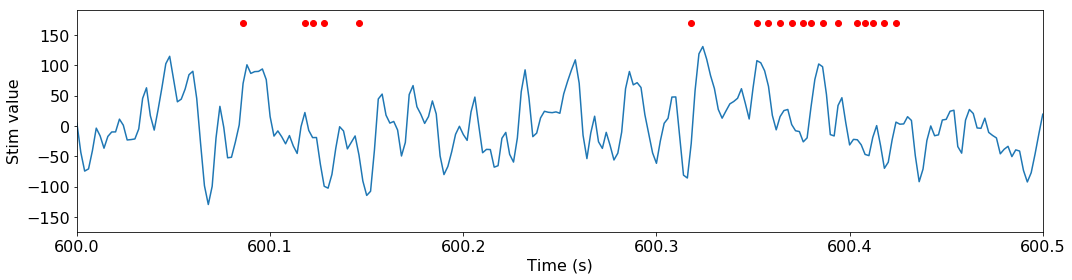

In [17]:
DT = 1/500  # timestep (s)

# make time vector
t = np.arange(len(spks)) * DT

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)

# plot stim over time
ax.plot(t, s)

ts_spk = spks.nonzero()[0] * DT

ax.scatter(ts_spk, 170*np.ones(len(ts_spk)), c='r')

ax.set_xlim(600, 600.5)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Stim value')

set_font_size(ax, 16)

## B

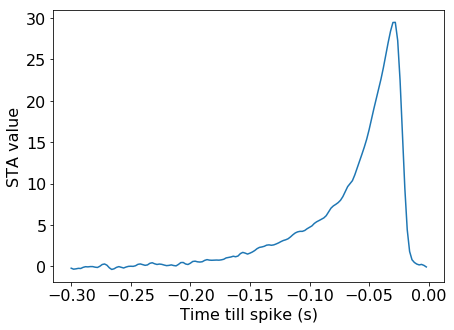

In [18]:
# compute spike-triggered avg
t_h = np.arange(-.3, 0, DT)
len_sta = len(t_h)

# we'll compute avgs by summing then dividing
pr_sum = np.zeros(len_sta)  # for all stims (prior)
st_sum = np.zeros(len_sta)  # for spike-triggering stims

n_pr = 0  # total timepoint ctr
n_spk = 0  # spk ctr

# loop over all time points from 300 ms to the end of the recording
for t_ctr in range(len_sta, len(t)):
    s_ = s[t_ctr-len_sta:t_ctr]  # get last 300 ms (150 timesteps) of stim
    
    pr_sum += s_  # add stim
    n_pr += 1  # increment timepoint ctr
    
    if spks[t_ctr]:  # if spk at this timepoint
        st_sum += s_  # add stim
        n_spk += 1  # increment spk ctr
        
sta = st_sum / n_spk  # compute STA
p_spk = n_spk / n_pr  # overall spike prob

# plot results
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(t_h, sta)

ax.set_xlabel('Time till spike (s)')
ax.set_ylabel('STA value')

set_font_size(ax, 16)

## C

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


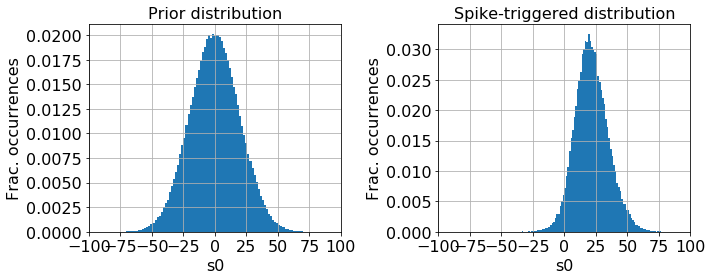

In [19]:
# get distributions of s0
s_0_pr = []
s_0_st = []

# loop over time steps
for t_ctr in range(len_sta, len(t)):
    s_ = s[t_ctr-len_sta:t_ctr]  # get recent stim chunk
    
    s_0 = np.dot(sta, s_) * DT  # compute s_0
    s_0_pr.append(s_0)  # store prior s_0
    
    # store s_0 if it triggered spike
    if spks[t_ctr]:
        s_0_st.append(s_0)
        
# make histograms nonoverlaid to get bins
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
axs[0].hist(s_0_pr, bins=100, normed=True)
axs[0].set_title('Prior distribution')

axs[1].hist(s_0_st, bins=100, normed=True)
axs[1].set_title('Spike-triggered distribution')

for ax in axs:
    ax.set_xlim(-100, 100)
    ax.grid()
    ax.set_xlabel('s0')
    ax.set_ylabel('Frac. occurrences')
    set_font_size(ax, 16)

## D, E

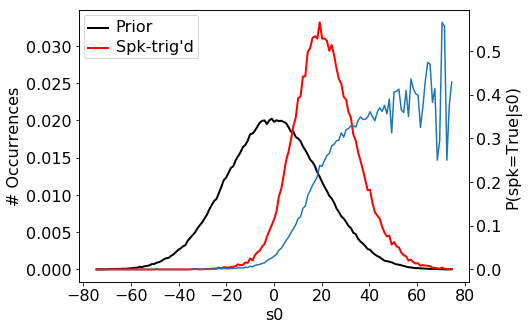

In [20]:
# compute hists w/ same bins and compute nonlinearity
bins = np.linspace(-75, 75, 150)
bincs = .5 * (bins[:-1] + bins[1:])

# compute counts per bins (normed=True ensures hists sum to 1)
cts_pr = np.histogram(s_0_pr, bins=bins, normed=True)[0]
cts_st = np.histogram(s_0_st, bins=bins, normed=True)[0]

# compute nonlinearity using Bayes' law
nonlin = cts_st * p_spk/cts_pr

# plot overlaid hists
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(bincs, cts_pr, lw=2, color='k')
ax.plot(bincs, cts_st, lw=2, color='r')

ax.set_xlabel('s0')
ax.set_ylabel('# Occurrences')

ax_twin = ax.twinx()
ax_twin.plot(bincs, nonlin)
ax_twin.set_ylabel('P(spk=True|s0)')

ax.legend(['Prior', 'Spk-trig\'d'], loc='upper left')

for ax_ in [ax, ax_twin]:
    set_font_size(ax_, 16)

# 8. Characterizing a mystery neuron

The data in `mystery_nrn.npy` was recorded from a "mystery" model neuron. As usual, it contains a time-varying stimulus and the corresponding spike train. Use the ideas and techniques from this tutorial to attempt to characterize what the neuron is doing, if anything at all. Make relevant plots to justify your conclusion.

If you come up with a hypothesis about what this neuron is doing, the function `gen_spks` in the file `mystery.npy` will output a spike train for this neuron given a stimulus. Design a stimulus to test your hypothesis and plot several example resulting spike trains to see if you are correct.

## Load data

In [21]:
# gen data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# load data
data = np.load('mystery_nrn.npy')[0]

t = data['t']
s = data['s']
spks = data['spks']

## Plot portion of stim and spks

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


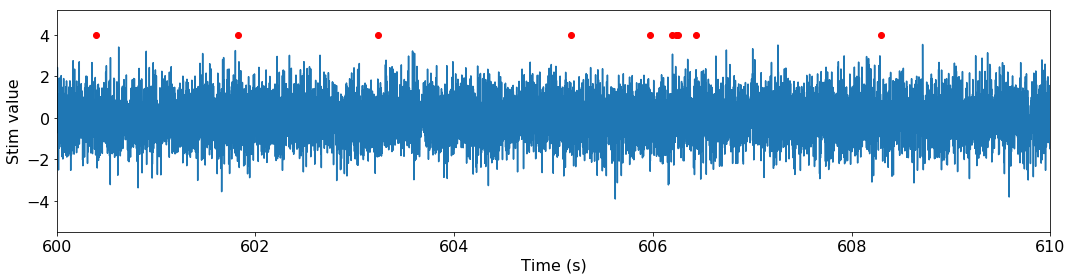

In [22]:
DT = 0.001

# plot some stim and spikes
fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
ax.plot(t, s)

ts_spk = spks.nonzero()[0] * DT

ax.scatter(ts_spk, 4*np.ones(len(ts_spk)), c='r')

ax.set_xlim(600, 610)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Stim value')

set_font_size(ax, 16)

## Compute STA

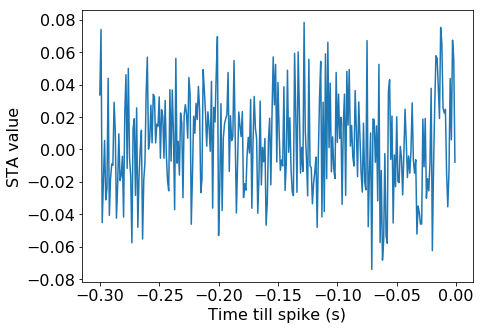

In [23]:
# compute spike-triggered avg
t_h = np.arange(-.3, 0, DT)
len_sta = len(t_h)

# we'll compute avgs by summing then dividing
pr_sum = np.zeros(len_sta)
st_sum = np.zeros(len_sta)

n_pr = 0
n_spk = 0

for t_ctr in range(len_sta, len(t)):
    s_ = s[t_ctr-len_sta:t_ctr]
    
    pr_sum += s_
    n_pr += 1
    
    if spks[t_ctr]:
        st_sum += s_
        n_spk += 1
        
sta = st_sum / n_spk  # STA
p_spk = n_spk / n_pr  # overall spike prob

# plot results
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(t_h, sta)

ax.set_xlabel('Time till spike (s)')
ax.set_ylabel('STA value')

set_font_size(ax, 16)

Hmm, the spike-triggered average doesn't look like much... let's try something higher order. How about STC?

## Attempt spike-triggered covariance (STC) analysis

In [24]:
# get spike-triggered ensemble
st_ens = []
t_idxs_spk = np.round(ts_spk/DT).astype(int)  # integer spike time indexes

# loop over all spikes
for t_idx_spk in t_idxs_spk[t_idxs_spk > len(t_h)]:
    s_ = s[t_idx_spk-len(t_h):t_idx_spk]  # get recent stim chunk
    st_ens.append(s_)  # store
    
st_ens = np.array(st_ens)

In [25]:
# get approx prior ensemble
pr_ens = []
# pick a subsample of time points so we don't have to use the whole stim
t_idxs_pr = np.random.randint(len(t_h), len(t), 20000)

# loop over sampled prior time points
for t_idx_pr in t_idxs_pr:
    s_ = s[t_idx_pr-len(t_h):t_idx_pr]  # get recent stim chunk
    
    # store
    pr_ens.append(s_)
    
pr_ens = np.array(pr_ens)

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


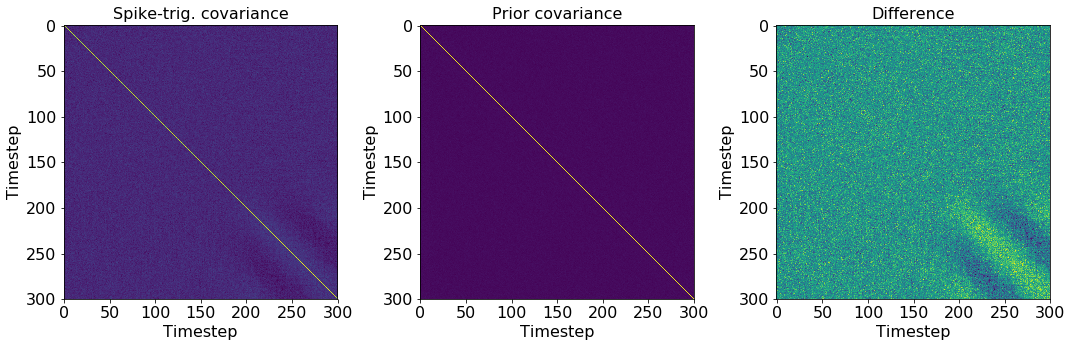

In [26]:
# calc covariances
k_st = np.cov(st_ens, rowvar=False)
k_pr = np.cov(pr_ens, rowvar=False)
# get covariance diff
k_diff = k_st - k_pr

# plot prior, spike-triggered, and diff covariances
fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

axs[0].imshow(k_st)
axs[0].set_title('Spike-trig. covariance')

axs[1].imshow(k_pr)
axs[1].set_title('Prior covariance')

axs[2].imshow(k_diff)
axs[2].set_title('Difference')

for ax in axs:
    ax.set_xlabel('Timestep')
    ax.set_ylabel('Timestep')
    
    set_font_size(ax, 16)

Ooh, there's some structure here. This seems promising. Let's plot the eigenvalue distribution of the difference between the two covariance matrices.

## Look at eigenvalues of STC covariance difference

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


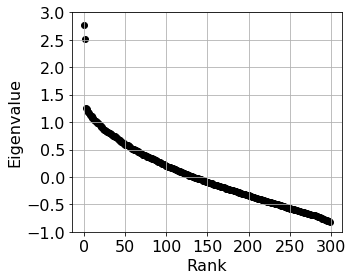

In [27]:
# get e-vals and e-vecs
evs, evecs = np.linalg.eig(k_diff)

# sort e-vals and e-vecs by descending e-vals
sort_idx = np.argsort(evs)[::-1]
evs = evs[sort_idx]
evecs = evecs[:, sort_idx]

# plot eigenvalue spectrum
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

ax.scatter(np.arange(len(evs)), evs, c='k')
ax.set_ylim(-1, 3)
ax.set_xlabel('Rank')
ax.set_ylabel('Eigenvalue')

ax.grid()

set_font_size(ax, 16)

Hmm, it looks like there are two modes that are different from the rest. That is, the spike-triggered covariance is larger than the prior along two dimensions. Let's plot the modes to see what they look like.

## Plot top two STC modes

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


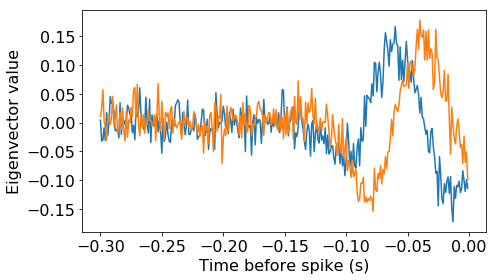

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), tight_layout=True)
ax.plot(t_h, evecs[:, 0])
ax.plot(t_h, evecs[:, 1])

ax.set_xlabel('Time before spike (s)')
ax.set_ylabel('Eigenvector value')

set_font_size(ax, 16)

It looks like both modes have significant structure. The blue mode seems similar to part of a cosine function, and the orange looks similar to a sine function.

Let's compute the projections of the stimulus onto these different modes at all timepoints and at timepoints of spikes.

## Show prior and spike-triggered distributions of stim projections onto top modes

In [29]:
stc_0 = evecs[:, 0]
stc_1 = evecs[:, 1]

# get prior and spike-triggered distributions of s_0 and s_1
s_0_pr = []
s_0_st = []
s_1_pr = []
s_1_st = []

# loop over time steps
for t_ctr in range(len_sta, len(t)):
    s_ = s[t_ctr-len_sta:t_ctr]  # get recent stim chunk
    
    s_0 = np.dot(stc_0, s_) * DT  # get projection onto mode 1
    s_0_pr.append(s_0)  # store prior
    
    s_1 = np.dot(stc_1, s_) * DT  # get projection onto mode 2
    s_1_pr.append(s_1)  # store prior
    
    # store if spks
    if spks[t_ctr]:
        s_0_st.append(s_0)
        s_1_st.append(s_1)

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


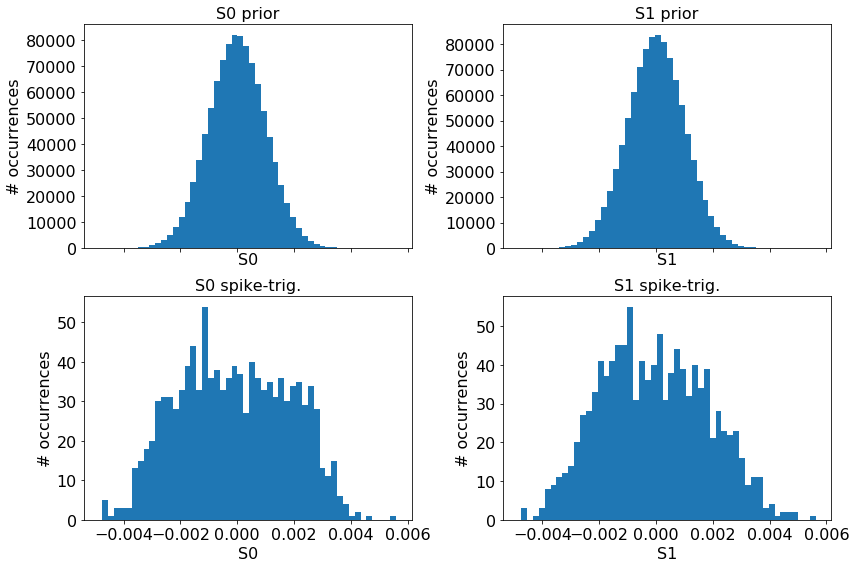

In [30]:
# plot prior and spike-triggered distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True, sharex=True)

# s_0
axs[0, 0].hist(s_0_pr, bins=50)
axs[0, 0].set_title('S0 prior')
axs[0, 0].set_xlabel('S0')

axs[1, 0].hist(s_0_st, bins=50)
axs[1, 0].set_title('S0 spike-trig.')
axs[1, 0].set_xlabel('S0')

# s_1
axs[0, 1].hist(s_1_pr, bins=50)
axs[0, 1].set_title('S1 prior')
axs[0, 1].set_xlabel('S1')

axs[1, 1].hist(s_1_st, bins=50)
axs[1, 1].set_title('S1 spike-trig.')
axs[1, 1].set_xlabel('S1')

for ax in axs.flat:
    ax.set_ylabel('# occurrences')
    set_font_size(ax, 16)

As expected, we see that the spike-triggered projections s0 and s1 have substantially larger variance than the prior  s0 and s1.

Let's compute the nonlinear function to see what the neuron might be doing with these quantities.

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


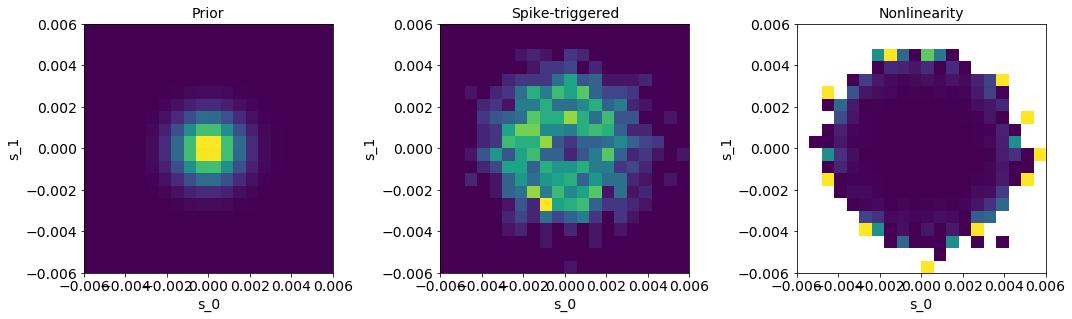

In [31]:
# get 2-D prior distr over s_0, s_1
cts_pr, bins_0, bins_1 = np.histogram2d(s_0_pr, s_1_pr, bins=np.linspace(-0.006, 0.006, 21), normed=True)
# get 2-D spike-triggerd distr over s_0, s_1
cts_st, bins_0, bins_1 = np.histogram2d(s_0_st, s_1_st, bins=np.linspace(-0.006, 0.006, 21), normed=True)
# compute nonlinearity from Bayes' law
nonlin = cts_st * p_spk / cts_pr

fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
axs[0].imshow(cts_pr, extent=[-.006, .006, -.006, .006])
axs[0].set_title('Prior')

axs[1].imshow(cts_st, extent=[-.006, .006, -.006, .006])
axs[1].set_title('Spike-triggered')

axs[2].imshow(nonlin, extent=[-.006, .006, -.006, .006])
axs[2].set_title('Nonlinearity')

for ax in axs:
    ax.set_xlabel('s_0')
    ax.set_ylabel('s_1')
    set_font_size(ax, 14)

Here we see this neuron is more likely to fire when s_0 and s_1 lie on a circle. Given that the top two spike-triggering modes appeared to approximate sine and cosine at a frequency near 10 Hz, this suggests that this neuron could be a frequency detector. In particular, since 

## Test hypothesis

In [32]:
from mystery import gen_spks

DT = 0.001

# make a stim with a time-varying frequency
t_frq = np.arange(0, 20, DT)
frq = np.linspace(1, 10, len(t_frq))
s_frq = np.sin(2*np.pi*frq*t_frq)
s_frq /= s_frq.std()

spks_mystery = []

# loop over trials
for ctr in range(10):
    # drive neuron with stim
    spks = gen_spks(t_frq, s_frq)
    spks_mystery.append(spks)  # store results

/Users/melete/Dropbox/Repositories/imbizo_2019_spikes_tutorial_students/mystery.py:51: RuntimeWarning: invalid value encountered in less
  spks = np.random.rand(len(t)) < p_spk


/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


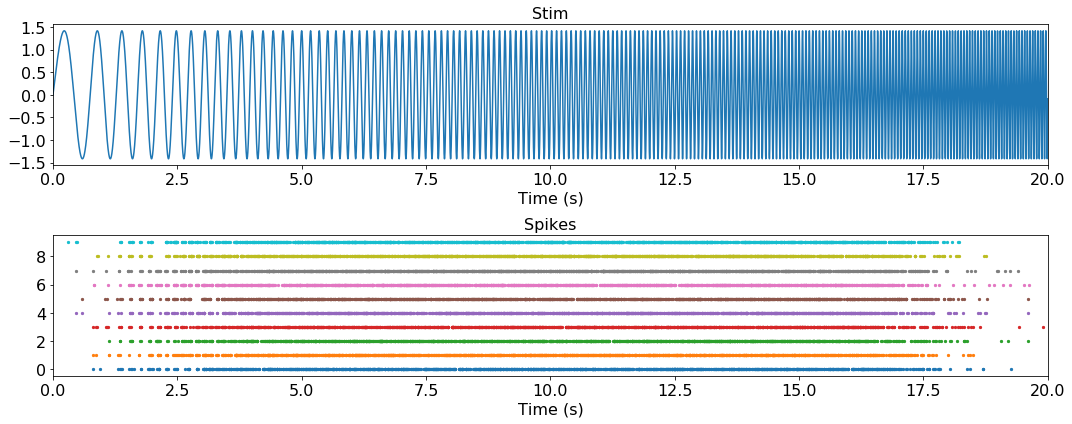

In [33]:
# plot stim and spk trains
fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)

axs[0].plot(t_frq, s_frq)
axs[0].set_title('Stim')

for ctr, spks in enumerate(spks_mystery):
    ts_spk = spks.nonzero()[0] * DT
    
    axs[1].scatter(ts_spk, ctr * np.ones(len(ts_spk)), s=5)
    
axs[1].set_title('Spikes')
    
for ax in axs:
    ax.set_xlim(0, 20)
    ax.set_xlabel('Time (s)')
    set_font_size(ax, 16)

Indeed, it looks like this neuron is selective for a specific range of stimulus frequencies, supporting our hypothesis.